In [1]:
%pylab inline
import os
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('SCRATCH')

'/scratch/zafarali'

In [2]:
statistic = 'KLpq'
template=('/scratch/zafarali/rvi/rvi_results/rvi_experiment/'
          '/end_point{end_point}'
          '/n_agents{n_agents}'
          '/lr{lr}'
          '/gae{gae}')

In [3]:
def get_hyperparameter(path, hyperparameter_name, splitter='/'):
    return path.split(hyperparameter_name)[1].split(splitter)[0]

# def get_hyperparameters(template, hyperparameter_name):
#     return map(lambda x : get_hyperparameter(x, hyperparameter_name), glob(template))

# def get_files_by_hyperparameter(template, hyperparameter_name):
#     return {x: template.replace('*', x) \
#             for x in get_hyperparameters(template, hyperparameter_name)}

In [4]:
def summarize_data(template_file, statistic, hyperparameters, sampler_name='ISSampler', return_pd=True):
    glob_path = os.path.join(template_file, 'Seed*', sampler_name + '_' + statistic + '.txt')
    files = glob(glob_path)
    datas = []
#     print(files)
    for file_ in files:
        raw_data = np.loadtxt(file_, delimiter=',')
        data = pd.DataFrame(data=raw_data, columns=[statistic, 'trajectories'])
        for hp in hyperparameters:
            data[hp] = get_hyperparameter(file_, hp)
            
        datas.append(data)
    
    if return_pd:
        return pd.concat(datas, ignore_index=True)
    else:
        return datas

In [5]:
extracted_data = []
extracted_data.extend(summarize_data(
    template.format(end_point=0, n_agents=1, lr='*', gae='*'),
    statistic='KLpq',
    sampler_name='RVISampler',
    hyperparameters=['end_point', 'lr', 'gae', 'n_agents', 'Seed'],
    return_pd=False
))
extracted_data.extend(summarize_data(
    template.format(end_point=12, n_agents=1, lr='*', gae='*'),
    statistic='KLpq',
    sampler_name='RVISampler',
    hyperparameters=['end_point', 'lr', 'gae', 'n_agents', 'Seed'],
    return_pd=False
))
extracted_data.extend(summarize_data(
    template.format(end_point=24, n_agents=1, lr='*', gae='*'),
    statistic='KLpq',
    sampler_name='RVISampler',
    hyperparameters=['end_point', 'lr', 'gae', 'n_agents', 'Seed'],
    return_pd=False
))
extracted_data.extend(summarize_data(
    template.format(end_point=36, n_agents=1, lr='*', gae='*'),
    statistic='KLpq',
    sampler_name='RVISampler',
    hyperparameters=['end_point', 'lr', 'gae', 'n_agents', 'Seed'],
    return_pd=False
))
extracted_data.extend(summarize_data(
    template.format(end_point=48, n_agents=1, lr='*', gae='*'),
    statistic='KLpq',
    sampler_name='RVISampler',
    hyperparameters=['end_point', 'lr', 'gae', 'n_agents', 'Seed'],
    return_pd=False
))

extracted_data = pd.concat(extracted_data, ignore_index=True)
extracted_data = extracted_data.apply(pd.to_numeric, errors='ignore',)

In [14]:
grouped_data = []

In [15]:
kls = extracted_data[extracted_data.trajectories == 4999].groupby(
    ['end_point', 'lr', 'gae']).mean().swaplevel()
kls['KLpq_5000'] = kls['KLpq']
grouped_data.append(kls['KLpq_5000'])

kls = extracted_data[extracted_data.trajectories == 4999].groupby(
    ['end_point', 'lr', 'gae']).std().swaplevel()
kls['KLpq_5000_std'] = kls['KLpq']
grouped_data.append(kls['KLpq_5000_std'])


kls = extracted_data[extracted_data.trajectories == 499].groupby(
    ['end_point', 'lr', 'gae']).mean().swaplevel()
kls['KLpq_500'] = kls['KLpq']
grouped_data.append(kls['KLpq_500'])


counts = extracted_data[extracted_data.trajectories == 4999].groupby(
    ['end_point', 'lr', 'gae']).count().swaplevel()
counts['count'] = counts['KLpq']
counts['proportion'] = counts['KLpq']/counts['Seed']

grouped_data.append(counts['count'])
grouped_data.append(counts['proportion'])

In [16]:
combined_df = pd.concat(grouped_data, axis=1)
combined_df['KLpq_5000_stderr'] = combined_df['KLpq_5000_std']/np.sqrt(combined_df['count'])

In [17]:
combined_df

KLpq_5000  KLpq_5000_std  KLpq_500  count  \
end_point gae      lr                                                    
0         0.952666 0.000068   0.001719       0.001087  0.037359    5.0   
          0.957255 0.000013   0.006236       0.010723  0.053209    5.0   
                   0.000021   0.006701       0.012073  0.043606    5.0   
                   0.000023   0.003136       0.004307  0.050814    5.0   
                   0.000049   0.002076       0.001825  0.042246    5.0   
                   0.000070   0.001802       0.001254  0.035719    5.0   
                   0.000093   0.001576       0.001144  0.045682    5.0   
                   0.000650   0.000470       0.000330  0.017218    5.0   
                   0.000821   0.000589       0.000252  0.026856    5.0   
          0.960136 0.000021   0.006845       0.012116  0.043545    5.0   
                   0.000070   0.001903       0.001403  0.037664    5.0   
                   0.000093   0.001716       0.001108  0.014414    5.0   
                   0.000650   0.000745       0.000248  0.007802    5.0   
          0.962962 0.000013   0.005568       0.009289  0.054768    5.0   
                   0.000013   0.005780       0.009881  0.055946    5.0   
                   0.000021   0.006874       0.012038  0.043373    5.0   
                   0.000023   0.002794       0.003681  0.050471    5.0   
                   0.000070   0.001862       0.001450  0.037597    5.0   
                   0.000093   0.001310       0.000734  0.014662    5.0   
                   0.000650   0.000498       0.000368  0.008540    5.0   
          0.968005 0.000013   0.020120            NaN  0.049698    1.0   
                   0.000023   0.005598       0.009388  0.048752    5.0   
                   0.000068   0.001609       0.001102  0.042910    5.0   
                   0.000070   0.001820       0.001284  0.040269    5.0   
                   0.000650   0.000839       0.000269  0.006243    5.0   
          0.969231 0.000013   0.004988       0.008062  0.049617    5.0   
                   0.000021   0.006977       0.012207  0.045251    5.0   
                   0.000023   0.001343       0.001821  0.048038    3.0   
                   0.000049   0.002450       0.002744  0.036916    5.0   
                   0.000068   0.001602       0.001095  0.044303    5.0   
...                                ...            ...       ...    ...   
48        0.962962 0.000093   0.003502       0.004024  0.044733    3.0   
                   0.000650   0.003747       0.000152  0.030194    2.0   
          0.968005 0.000013        NaN            NaN  0.004652    NaN   
                   0.000023   0.000333            NaN  0.016046    1.0   
                   0.000068   0.000600       0.000887  0.045600    3.0   
                   0.000070   0.030137       0.051815  0.013700    3.0   
                   0.000650   0.052286       0.014482  0.095497    2.0   
          0.969231 0.000013   0.000190            NaN  0.004650    1.0   
                   0.000021   0.002334            NaN  0.011338    1.0   
                   0.000023        NaN            NaN  0.016043    0.0   
                   0.000049   0.000661            NaN  0.080762    1.0   
                   0.000068   0.000755       0.000910  0.011705    3.0   
                   0.000070   0.026376       0.045107  0.013815    3.0   
                   0.000093   0.003102       0.002699  0.049910    3.0   
          0.975195 0.000021   0.001968            NaN  0.011359    1.0   
                   0.000049   0.001844            NaN  0.024858    1.0   
                   0.000070   0.027685       0.046246  0.046181    3.0   
                   0.000093   0.001721       0.000302  0.055979    3.0   
                   0.000650   0.034414       0.021869  0.093662    3.0   
          0.977286 0.000013   0.000171            NaN  0.004652    1.0   
                   0.000013   0.000282            NaN  0.004739    1.0   
                   0.000021   0.0

In [18]:
with open('rvi_aggregated.csv', 'w') as f_:
    f_.write(pd.concat(grouped_data, axis=1).to_csv())

In [37]:
for end_point in [0, 12, 24, 36, 48]:
    print(extracted_data[extracted_data.trajectories == 4999].groupby(
        ['end_point', 'lr', 'gae']).count().query('end_point == {}'.format(end_point)))

                             KLpq  trajectories  n_agents  Seed
end_point lr       gae                                         
0         0.000013 0.962962     5             5         5     5
                   0.968005     1             1         1     1
                   0.969231     5             5         5     5
                   0.977286     5             5         5     5
                   0.981872     5             5         5     5
                   0.957255     5             5         5     5
                   0.962962     5             5         5     5
                   0.977286     5             5         5     5
          0.000021 0.957255     5             5         5     5
                   0.960136     5             5         5     5
                   0.962962     5             5         5     5
                   0.969231     5             5         5     5
                   0.975195     5             5         5     5
                   0.977286     5       

In [36]:
for end_point in [0, 12, 24, 36, 48]:
    print(extracted_data[extracted_data.trajectories == 499].groupby(
        ['end_point', 'lr', 'gae']).mean().query('end_point == {}'.format(end_point)))

                                 KLpq  trajectories  n_agents      Seed
end_point lr       gae                                                 
0         0.000013 0.962962  0.054768         499.0       1.0  2.000000
                   0.968005  0.049698         499.0       1.0  2.000000
                   0.969231  0.049617         499.0       1.0  2.000000
                   0.977286  0.049194         499.0       1.0  2.000000
                   0.981872  0.049099         499.0       1.0  2.000000
                   0.957255  0.053209         499.0       1.0  2.000000
                   0.962962  0.055946         499.0       1.0  2.000000
                   0.977286  0.049251         499.0       1.0  2.000000
          0.000021 0.957255  0.043606         499.0       1.0  2.000000
                   0.960136  0.043545         499.0       1.0  2.000000
                   0.962962  0.043373         499.0       1.0  2.000000
                   0.969231  0.045251         499.0       1.0  2

In [35]:
for end_point in [0, 12, 24, 36, 48]:
    print(extracted_data[extracted_data.trajectories == 4999].groupby(
        ['end_point', 'lr', 'gae']).mean().query('end_point == {}'.format(end_point)))

                                 KLpq  trajectories  n_agents  Seed
end_point lr       gae                                             
0         0.000013 0.962962  0.005568        4999.0       1.0   2.0
                   0.968005  0.020120        4999.0       1.0   0.0
                   0.969231  0.004988        4999.0       1.0   2.0
                   0.977286  0.004705        4999.0       1.0   2.0
                   0.981872  0.004117        4999.0       1.0   2.0
                   0.957255  0.006236        4999.0       1.0   2.0
                   0.962962  0.005780        4999.0       1.0   2.0
                   0.977286  0.004954        4999.0       1.0   2.0
          0.000021 0.957255  0.006701        4999.0       1.0   2.0
                   0.960136  0.006845        4999.0       1.0   2.0
                   0.962962  0.006874        4999.0       1.0   2.0
                   0.969231  0.006977        4999.0       1.0   2.0
                   0.975195  0.005216        499

ValueError: Index contains duplicate entries, cannot reshape

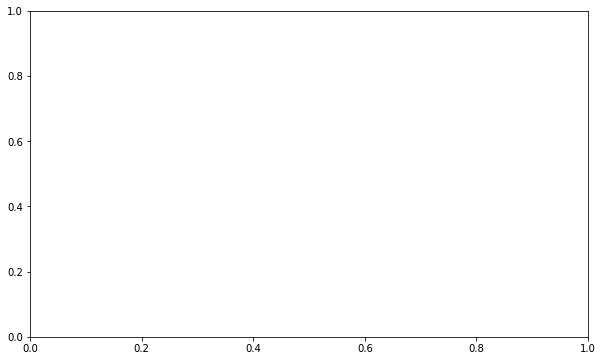

In [38]:
plt.figure(figsize=(10, 6))
sns.tsplot(
    data=extracted_data[np.isclose(extracted_data.end_point, 0)],
    unit='Seed', value='KLpq', time='trajectories')
plt.title('EndPoint=0')

/home/ml/zahmed8/zaf-tmp-pyt04/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/ml/zahmed8/zaf-tmp-pyt04/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'EndPoint=12')

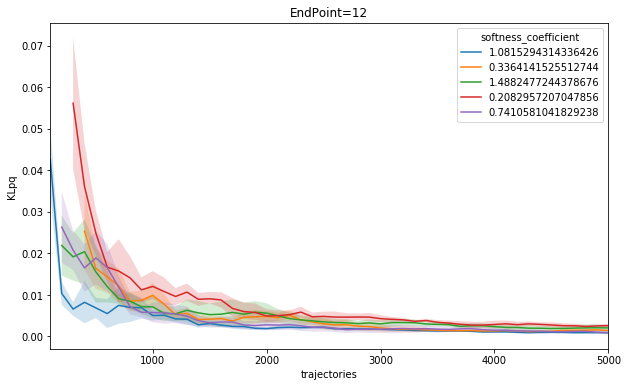

In [194]:
plt.figure(figsize=(10, 6))
sns.tsplot(
    data=extracted_data[np.isclose(extracted_data.end_point, 12)],
    unit='Seed', value='KLpq', time='trajectories', condition='softness_coefficient')
plt.title('EndPoint=12')

/home/ml/zahmed8/zaf-tmp-pyt04/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/ml/zahmed8/zaf-tmp-pyt04/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'EndPoint=24')

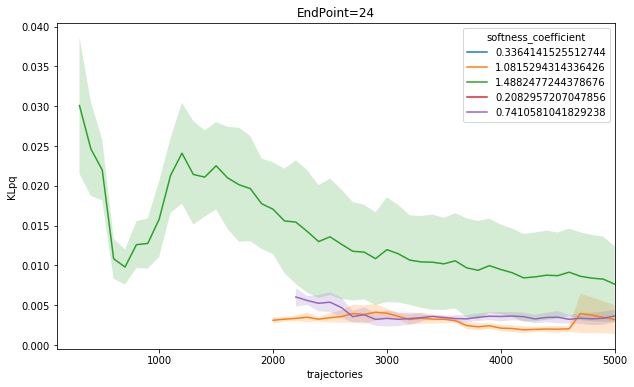

In [195]:
plt.figure(figsize=(10, 6))
sns.tsplot(
    data=extracted_data[np.isclose(extracted_data.end_point, 24)],
    unit='Seed', value='KLpq', time='trajectories', condition='softness_coefficient')
plt.title('EndPoint=24')